# Circuit of Simon's Algorithm using Cirq

This notebook will teach you how to construct your own circuits for the Simon's algorithm using Cirq.

# Install Cirq

Install Cirq if you haven't.

In [ ]:
!pip install --quiet cirq

     |████████████████████████████████| 409 kB 5.1 MB/s 
     |████████████████████████████████| 328 kB 47.7 MB/s 
     |████████████████████████████████| 47 kB 3.9 MB/s 
     |████████████████████████████████| 1.5 MB 39.3 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 1.3 MB 60.8 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 65 kB 3.2 MB/s 
     |████████████████████████████████| 97 kB 5.7 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 
     |████████████████████████████████| 220 kB 51.6 MB/s 
     |████████████████████████████████| 10.1 MB 71.3 MB/s 
     |████████████████████████████████| 43 kB 1.3 MB/s 
     |████████████████████████████████| 15.7 MB 173 kB/s 
     |████████████████████████████████| 229 kB 47.0 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
     |█████████████████████████

# Importing Packages

In [ ]:
import cirq # No need to explain why
from cirq.contrib.svg import SVGCircuit # Required to display some fancy circuits

# The circuits

Now, we move on to main part of the notebook. In this section, we shall explain the construction of circuits for different types of functions defined on two and three binary variables, that one can use the Simon's algorithm for. In this case, the Simon's algorithm is used to figure out a bit string $s$, given access to a function $f$, which satisfies the criterion that

\begin{equation}
  f(x) = f(y) \iff x = y \text{ or } x \oplus y = s 
\end{equation}

The Simon's algorithm consists of two main subroutines:

1. A quantum circuit which gives rise to a set of linear equations.
2. A classical procedure to solve the set of linear equations (Gaussian elimination)



## Functions defined on two binary variables

Let $f: \{00, 01, 10, 11 \} \rightarrow \{00, 01, 10, 11 \}$ be a function that qualifies as a function on which Simon's algorithm can be used for. Let $U_f$ be an oracle circuit such that

\begin{equation}
  U_f |x\rangle |y\rangle |z_1\rangle |z_2\rangle = |x\rangle |y\rangle |z_1z_2 \oplus f(x,y)\rangle
\end{equation}

Then, the quantum circuit for the Simon's algorithm is given as

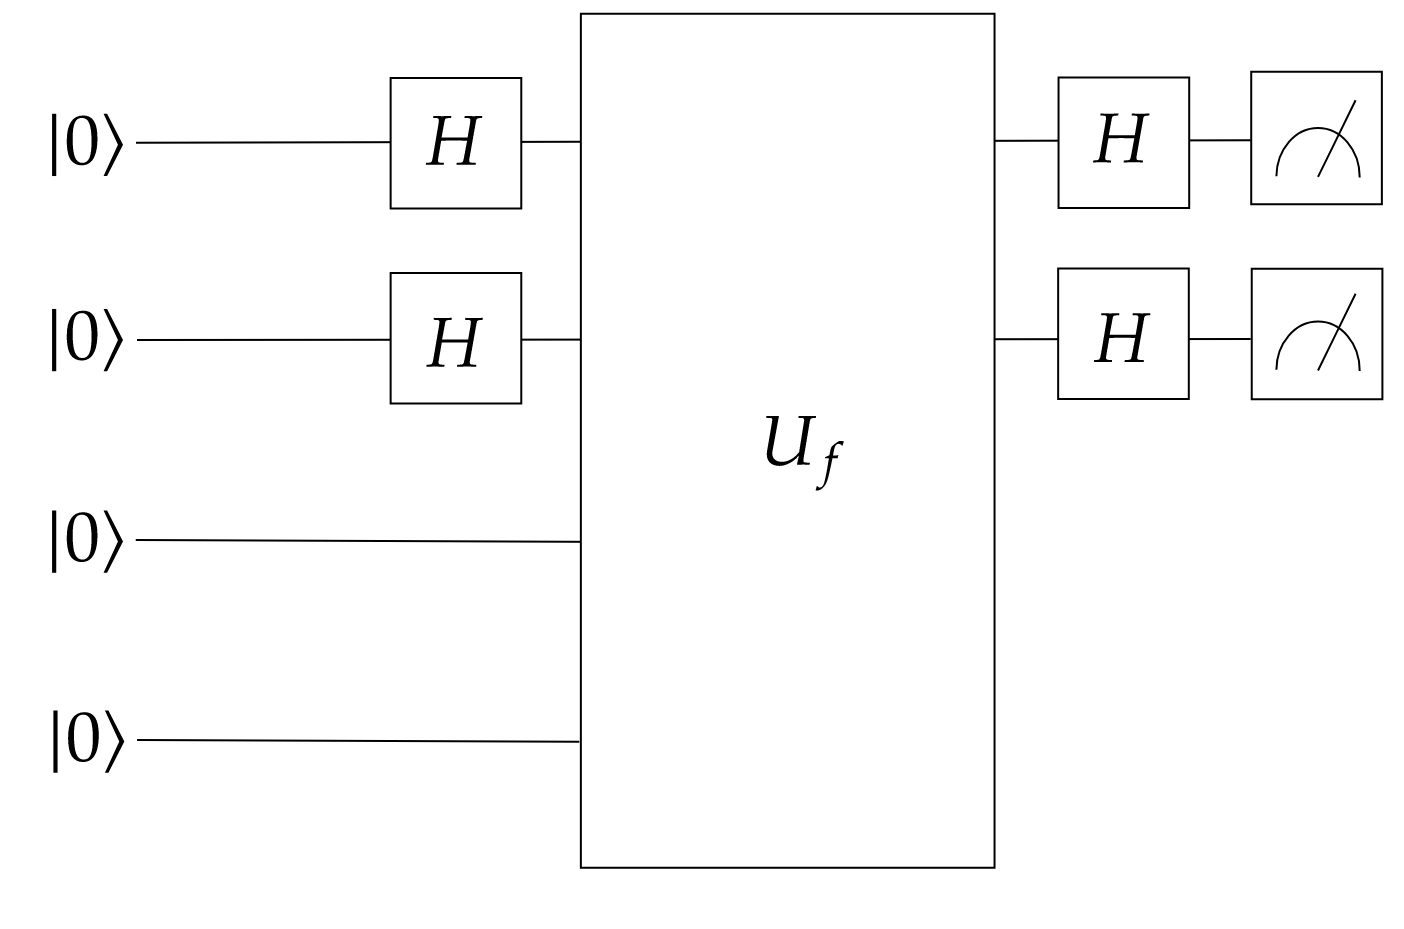

The circuit is executed and measured multiple times. Each result is a two qubit bit string. These bit strings are stacked to construct a matrix $A$ which gives rise to the system of linear equations

\begin{equation}
  Ax = 0
\end{equation}

This system of linear equations is solved classically (Gaussian elimination) and $s$ is retrieved as a unique solution. If all outcomes occur equally likely, then we are looking at a one-one function and $s=00$. Otherwise, the non-zero solution to the system of equations is the bit-string we are looking for. Now, we shall move onto some simple examples.

### When $s$ = 11

Let the hidden bitstring $s$ = 11 and let $f_{11}:\{00,01,10,11\} \rightarrow \{00,01,10,11\}$ be defined as

\begin{equation}
  f_1(00) = 00 \\
  f_1(01) = 10 \\
  f_1(10) = 10 \\
  f_1(11) = 00 \\
\end{equation}

We can see that this functions satisfies the criterion which qualifies it to be solved by the Simon's algorithm. The first step is to construct $U_{f_{11}}$. By the definition of $U_{f_{11}}$, one can see that $U_{f_{11}}$ is a circuit that should be capable of the transformation

\begin{equation}
  U_{f_{11}}|00\rangle |00\rangle = |00\rangle|00 \oplus f_{11}(00)\rangle = |00\rangle|00\rangle\\
  U_{f_{11}}|00\rangle |01\rangle = |00\rangle|01 \oplus f_{11}(00)\rangle = |00\rangle|01\rangle\\
  U_{f_{11}}|00\rangle |10\rangle = |00\rangle|10 \oplus f_{11}(00)\rangle = |00\rangle|10\rangle\\
  U_{f_{11}}|00\rangle |11\rangle = |00\rangle|11 \oplus f_{11}(00)\rangle = |00\rangle|11\rangle\\
  U_{f_{11}}|01\rangle |00\rangle = |01\rangle|00 \oplus f_{11}(01)\rangle = |01\rangle|10\rangle\\
  U_{f_{11}}|01\rangle |01\rangle = |01\rangle|01 \oplus f_{11}(01)\rangle = |01\rangle|11\rangle\\
  U_{f_{11}}|01\rangle |10\rangle = |01\rangle|10 \oplus f_{11}(01)\rangle = |01\rangle|00\rangle\\
  U_{f_{11}}|01\rangle |11\rangle = |01\rangle|11 \oplus f_{11}(01)\rangle = |01\rangle|01\rangle\\
  U_{f_{11}}|10\rangle |00\rangle = |10\rangle|00 \oplus f_{11}(10)\rangle = |10\rangle|10\rangle\\
  U_{f_{11}}|10\rangle |01\rangle = |10\rangle|01 \oplus f_{11}(10)\rangle = |10\rangle|11\rangle\\
  U_{f_{11}}|10\rangle |10\rangle = |10\rangle|10 \oplus f_{11}(10)\rangle = |10\rangle|00\rangle\\
  U_{f_{11}}|10\rangle |11\rangle = |10\rangle|11 \oplus f_{11}(10)\rangle = |10\rangle|01\rangle\\
  U_{f_{11}}|11\rangle |00\rangle = |11\rangle|00 \oplus f_{11}(11)\rangle = |11\rangle|00\rangle\\
  U_{f_{11}}|11\rangle |01\rangle = |11\rangle|01 \oplus f_{11}(11)\rangle = |11\rangle|01\rangle\\
  U_{f_{11}}|11\rangle |10\rangle = |11\rangle|10 \oplus f_{11}(11)\rangle = |11\rangle|10\rangle\\
  U_{f_{11}}|11\rangle |11\rangle = |11\rangle|11 \oplus f_{11}(11)\rangle = |11\rangle|11\rangle\\
\end{equation}

This circuit is a CNOT gate applied to the first and third qubit, then another CNOT gate applied to the second and third qubit. So, for this function, two CNOT gates is the required oracle $U_{f_{11}}$. Then the final circuit can be seen as

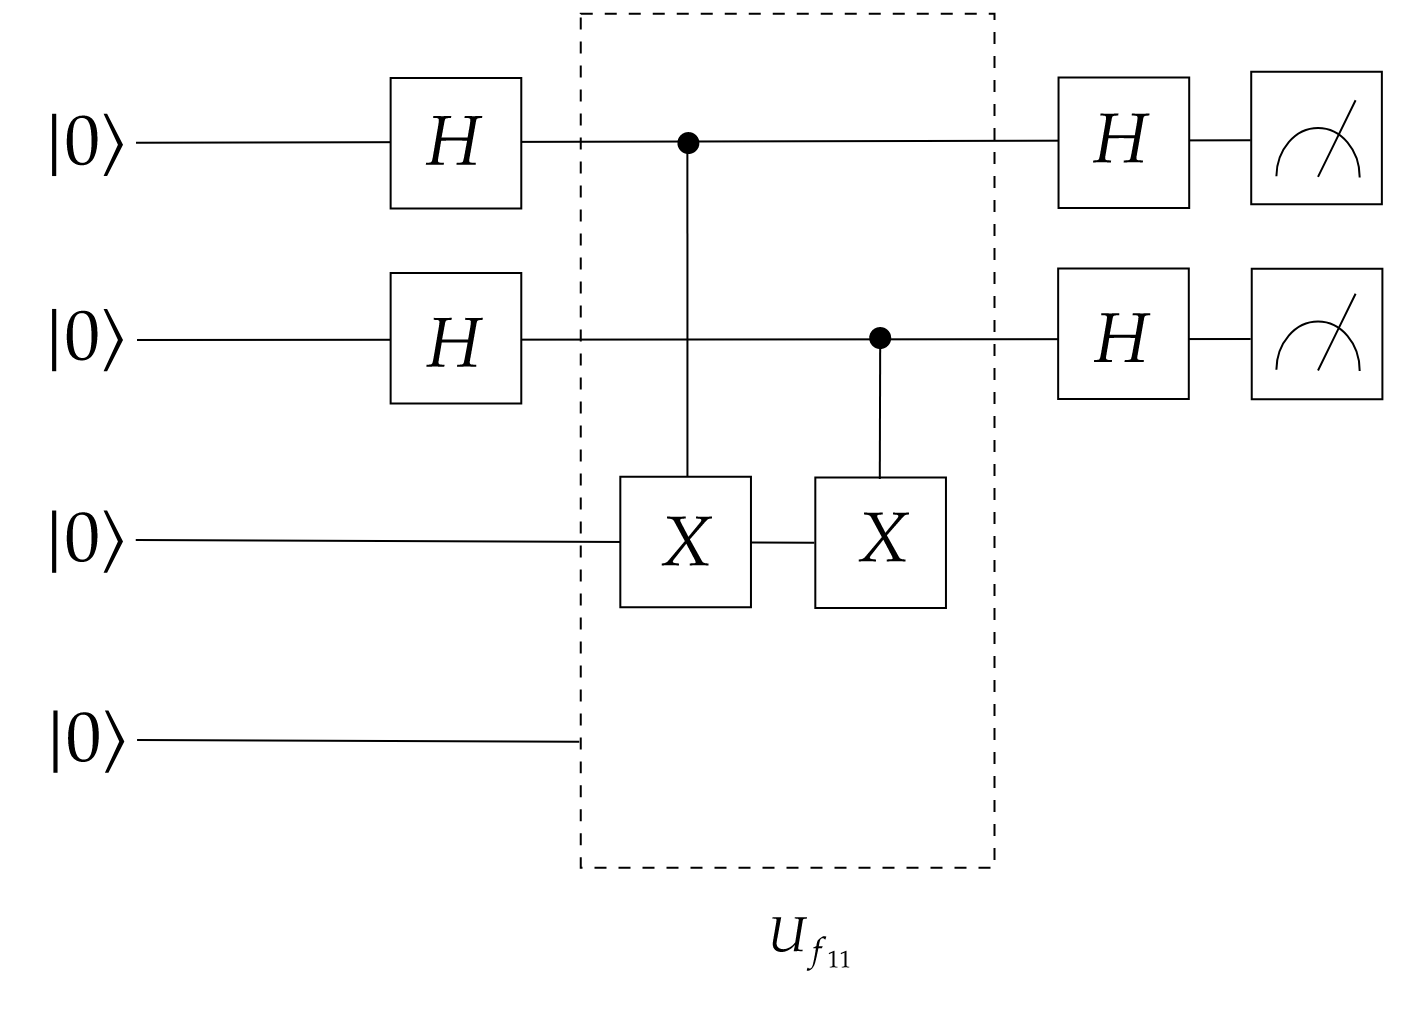

Now, we move on to constructing this circuit using Qiskit

First we initialze a circuit

In [ ]:
# Prepare circuit 
circuit = cirq.Circuit()

The next step is to initialize the qubits. For this circuit, we require $4$ qubits. 

In [ ]:
# Prepare qubits
q0, q1, q2, q4 = cirq.LineQubit.range(4)

Now, we shall start applying the gates.

First we apply $H$ gates on the first and second qubits, then our oracle (CNOT gates), and two more $H$ gates on the first and second qubits.

In [ ]:
# Apply Hadamrd on qubits 0,1
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))

# Apply Oracle
circuit.append(cirq.CNOT(q1,q2))
circuit.append(cirq.CNOT(q0,q2))

# Apply Hadamrd on qubits 0,1
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))

Now, we shall measure the first qubit. The measurement is done 1000 times, that is, the circuit is repeatedly carried out 1000 times.

Measurement result of qubit 0: Counter({0: 528, 3: 472})


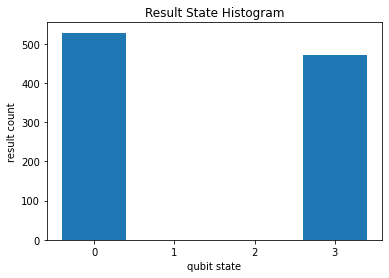

In [ ]:
# Measure qubits 0,1

s=cirq.Simulator()
results=s.simulate(circuit)

circuit.append(cirq.measure(q0, q1, key='0'))

samples=s.run(circuit, repetitions=1000)

# Display measurement results
print("Measurement result of qubit 0: {}".format(samples.histogram(key='0')))

# Plot the results
cirq.vis.plot_state_histogram(samples)

The measurement result is read as {'Output': Number of times output occurred}. We can see that the only non-zero output string is $11$. Then $s$ should not be $00$, because otherwise. $01$ and $10$ should also occur in about equal proportion. So, we are looking for a non-zero solution to the equation 
\begin{equation}
  \begin{bmatrix}
    1 & 1
  \end{bmatrix}
  \begin{bmatrix}
    x \\ y
  \end{bmatrix}
  =
  \begin{bmatrix}
    0 
  \end{bmatrix}
\end{equation}

This is clearly the string $11$.

The circuit that we have just built can be visualized using Cirq using this code

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


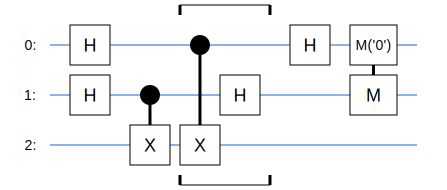

In [ ]:
# Display circuit
SVGCircuit(circuit)

### When $s = 00$

Let $s = 00$. Any bijective function can be a candidate here. So in this case, lets use the identity functions. Let $f_{00}:\{00,01,10,11\} \rightarrow \{00,01,10,11\}$ be defined as

\begin{equation}
  f_{00}(00) = 00 \\
  f_{00}(01) = 01 \\
  f_{00}(10) = 10 \\
  f_{00}(11) = 11 \\
\end{equation}

The first step is to construct $U_{f_{00}}$. By the definition of $U_{f_{00}}$, one can see that $U_{f_{00}}$ can be executed by the circuit

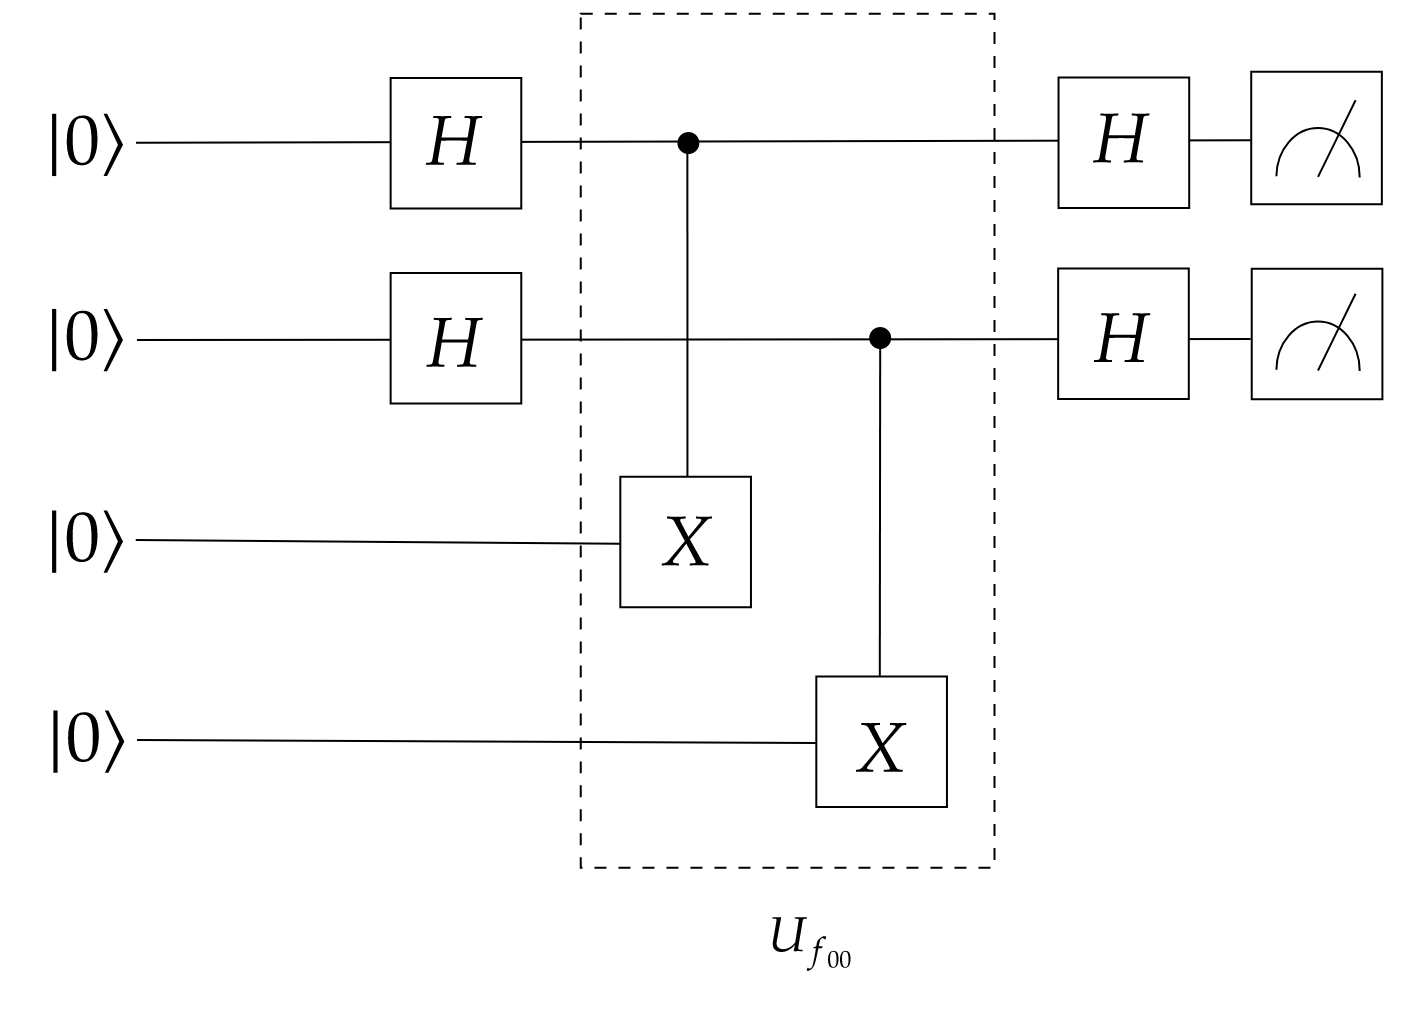

Since constructing and executing $f_{11}$'s circuit was explained in detail, we are not going to explain $f_{00}$'s circuit extensively as it is extremely similar to $f_1$'s, except for the oracle part. 

Executing the cell below runs a quantum circuit for the Simon's algorithm for the function $f_{00}$ 100 times.

Measurement result of qubit 0: Counter({0: 268, 1: 249, 3: 249, 2: 234})


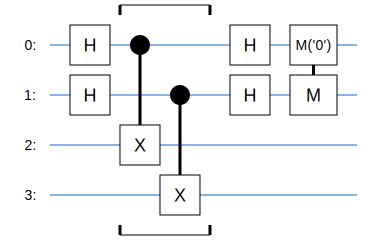

In [ ]:
# Prepare circuit and qubits
circuit = cirq.Circuit()
q0, q1, q2, q3 = cirq.LineQubit.range(4)

# Apply Hadamrd on qubits 0,1
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))

# Apply Oracle
circuit.append(cirq.CNOT(q0,q2))
circuit.append(cirq.CNOT(q1,q3))

# Apply Hadamrd on qubits 0,1
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))

# Measure qubits 0,1
s=cirq.Simulator()
results=s.simulate(circuit)

circuit.append(cirq.measure(q0, q1, key='0'))

samples=s.run(circuit, repetitions=1000)

# Display measurement results
print("Measurement result of qubit 0: {}".format(samples.histogram(key='0')))

# Display circuit
SVGCircuit(circuit)

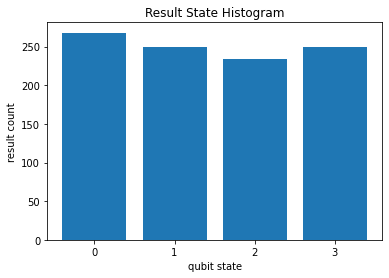

In [ ]:
# Plot the results
cirq.vis.plot_state_histogram(samples)

From the meaurement outputs, we see that all $4$ outputs are almost equally likely. So, we can safely conclude that $s = 00$.

## Functions defined on three binary variables

Let $f: \{0,1\}^3 \rightarrow \{0,1\}^3$ be a function that qualifies as a function on which Simon's algorithm can be used for. Let $U_f$ be an oracle circuit such that

\begin{equation}
  U_f |x_1 x_2 x_3\rangle |z_1 z_2 z_3\rangle = |x_1 x_2 x_3\rangle |z_1 z_2 z_3 \oplus f(x_1,x_2,x_3)\rangle
\end{equation}

Then, similar to the earlier case, the quantum circuit for the Simon's algorithm is given as

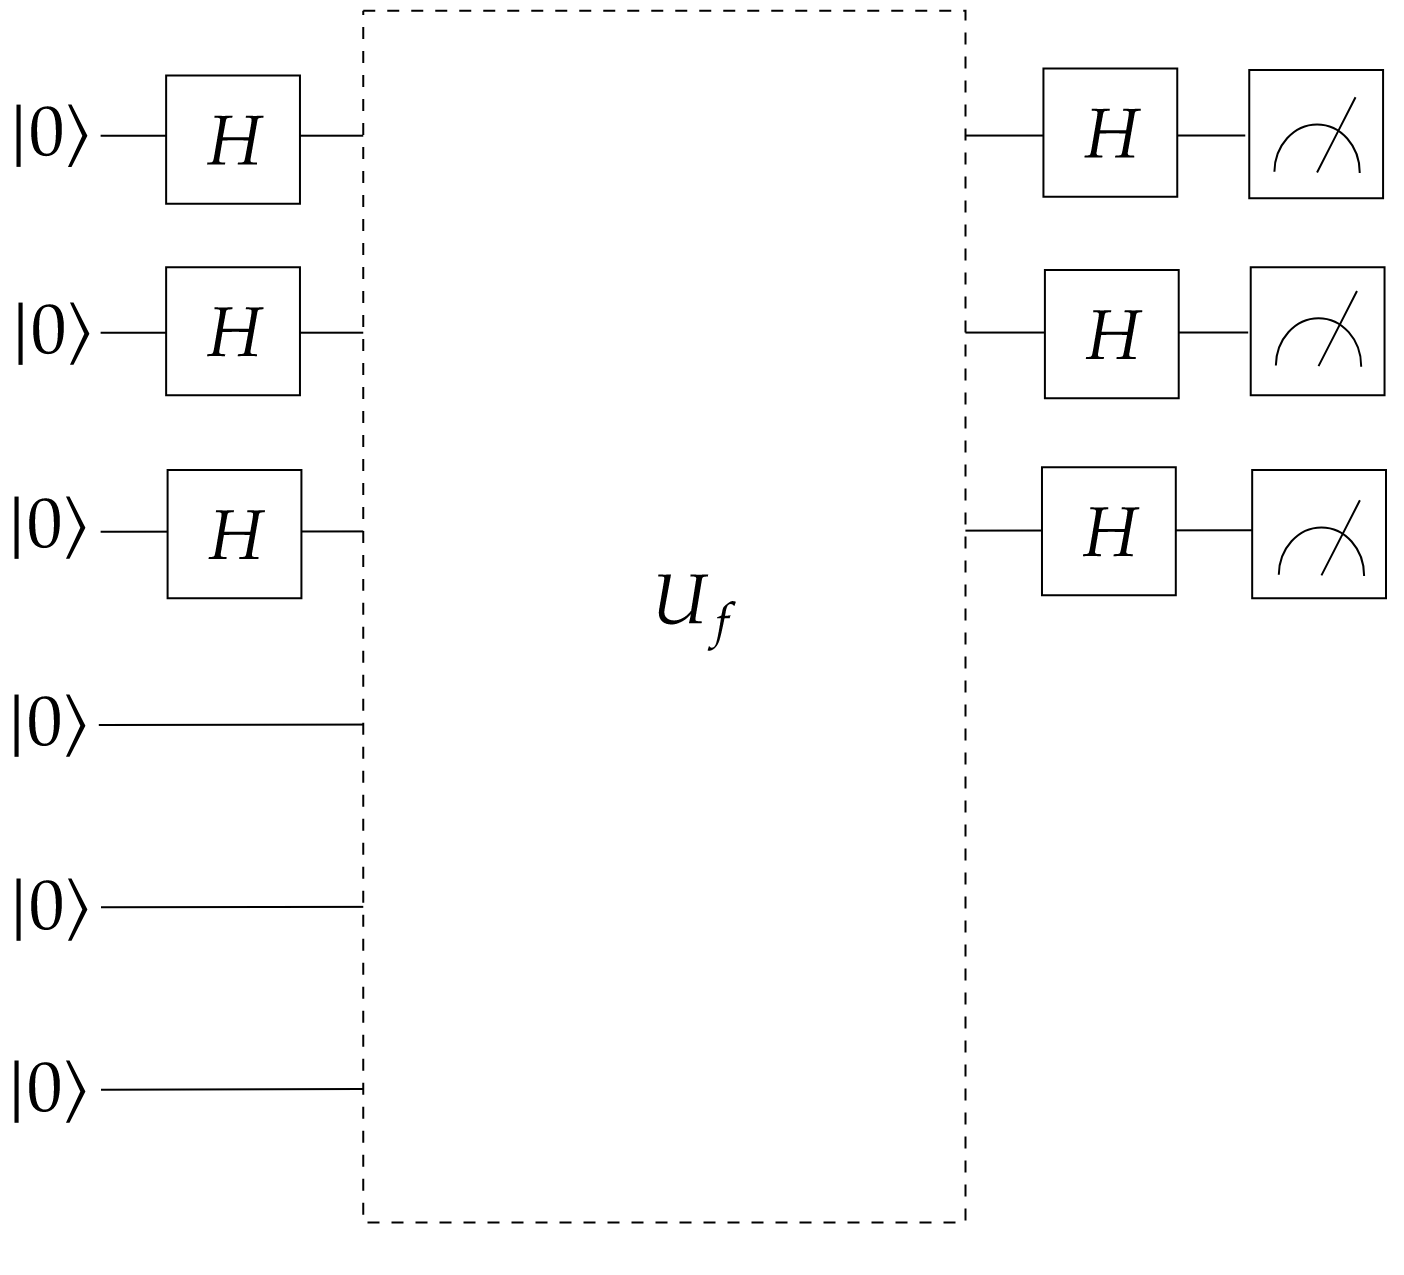

### When $s = 011$

Let the hidden bitstring $s$ = 011 and let $f_{011}:\{0,1\}^3 \rightarrow \{0,1\}^3$ be defined as

\begin{equation}
  f_{011}(000) = 000 \\
  f_{011}(001) = 001 \\
  f_{011}(010) = 001 \\
  f_{011}(011) = 000 \\
  f_{011}(100) = 100 \\
  f_{011}(101) = 101 \\
  f_{011}(110) = 101 \\
  f_{011}(111) = 100 \\
\end{equation}

We can see that this functions satisfies the criterion which qualifies it to be solved by the Simon's algorithm. The first step is to construct $U_{f_{011}}$. By the definition of $U_{f_{011}}$, one can see that $U_{f_{011}}$ is a circuit that should be capable of the transformation

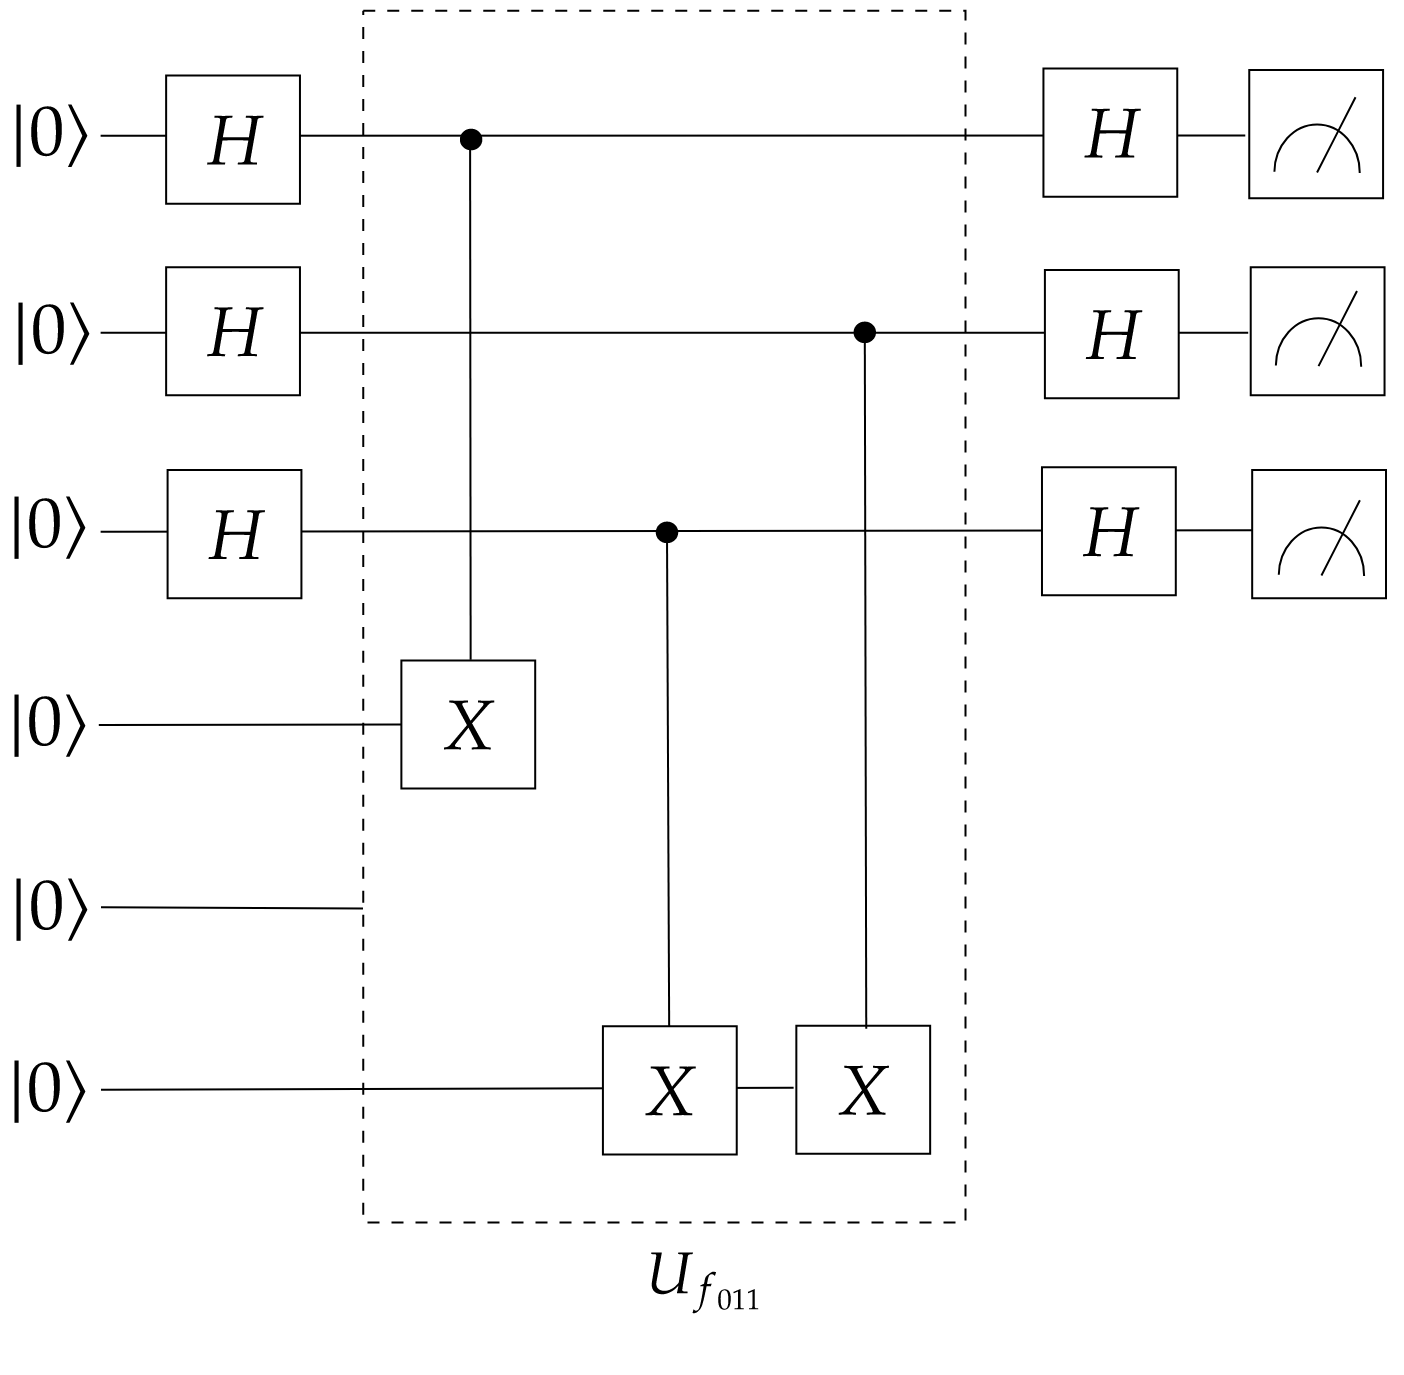

Executing the cell below runs a quantum circuit for the Simon's algorithm for the function $f_{011}$ 1000 times.

Measurement result of qubit 0: Counter({3: 263, 4: 256, 0: 245, 7: 236})


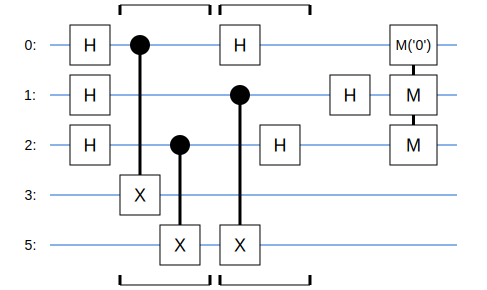

In [ ]:
# Prepare circuit and qubits
circuit = cirq.Circuit()
q0, q1, q2, q3, q4, q5 = cirq.LineQubit.range(6)

# Apply Hadamrd on qubits 0,1,2 
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))

# Apply Oracle
circuit.append(cirq.CNOT(q0,q3))
circuit.append(cirq.CNOT(q2,q5))
circuit.append(cirq.CNOT(q1,q5))

# Apply Hadamrd on qubits 0,1
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))

# Measure qubits 0,1
s=cirq.Simulator()
results=s.simulate(circuit)

circuit.append(cirq.measure(q0, q1, q2, key='0'))

samples=s.run(circuit, repetitions=1000)

# Display measurement results
print("Measurement result of qubit 0: {}".format(samples.histogram(key='0')))

# Display circuit
SVGCircuit(circuit)

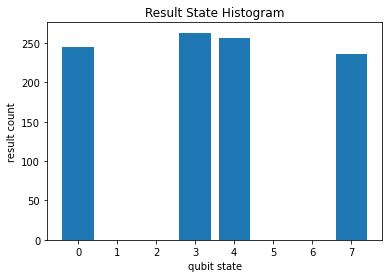

In [ ]:
# Plot the results
cirq.vis.plot_state_histogram(samples)

Since all outputs are not equally likely, we can rule out $s = 000$. A linearly independent set of bitstrings from the outputs can be chosen to build the set of linear equations

\begin{equation}
  \begin{bmatrix}
    1 & 0 & 0\\
    0 & 1 & 1
  \end{bmatrix}
  \begin{bmatrix}
    x \\ y \\ z
  \end{bmatrix}
  =
  \begin{bmatrix}
    0 \\ 0
  \end{bmatrix}
\end{equation}

The non-zero solution to this system is $s = 011$.

### When $s = 000$

Let $s = 000$. Any bijective function can be a candidate here. So in this case, lets use the identity functions. Let $f_{000}:\{0,1\}^3 \rightarrow \{0,1\}^3$ be defined as

\begin{equation}
  f_{000}(000) = 000 \\
  f_{000}(001) = 001 \\
  f_{000}(010) = 010 \\
  f_{000}(011) = 011 \\
  f_{000}(100) = 100 \\
  f_{000}(101) = 101 \\
  f_{000}(110) = 110 \\
  f_{000}(111) = 111 \\
\end{equation}

The first step is to construct $U_{f_{000}}$. Similar to the circuit for $f_{00}$, by the definition of $U_{f_{000}}$, one can see that $U_{f_{000}}$ can be executed by the circuit

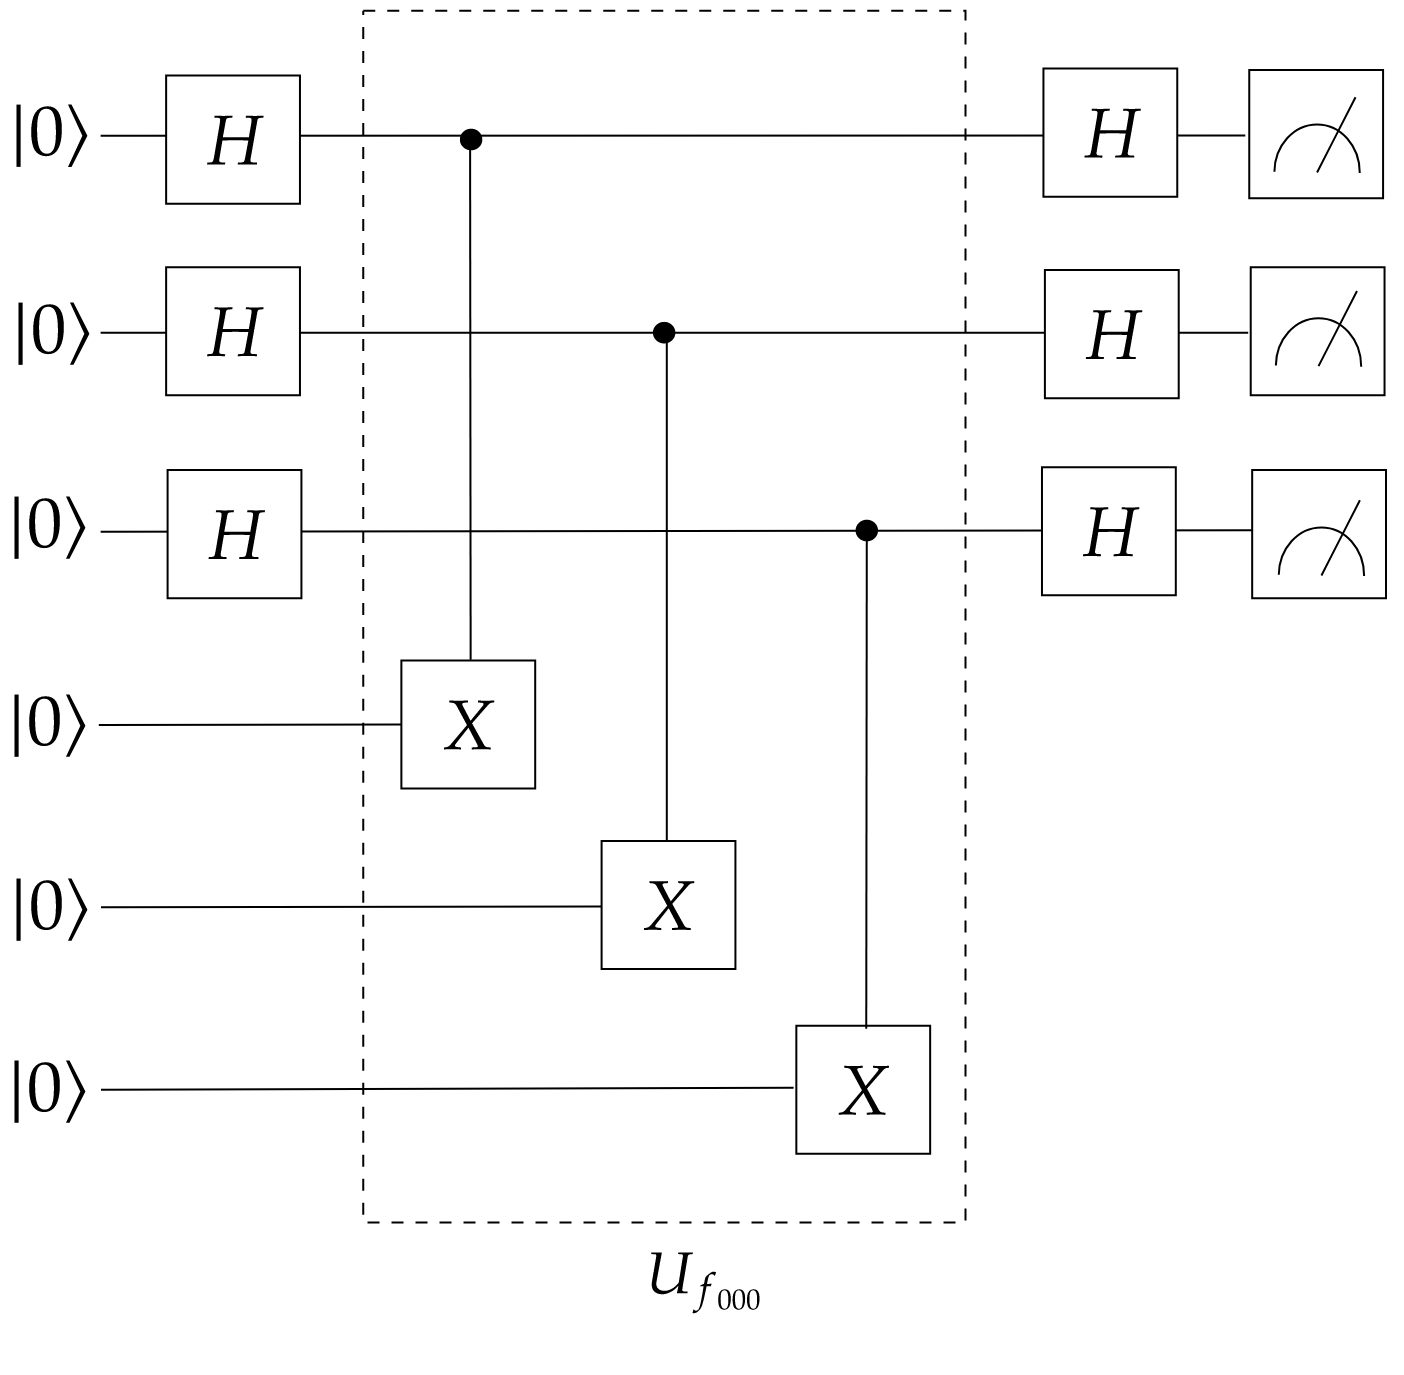

Executing the cell below runs a quantum circuit for the Simon's algorithm for the function $f_{000}$ 1000 times.

Measurement result of qubit 0: Counter({0: 138, 7: 137, 3: 128, 4: 126, 5: 126, 1: 125, 6: 112, 2: 108})


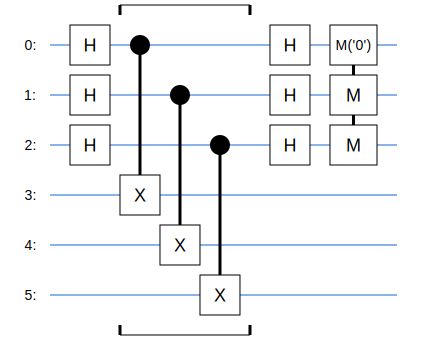

In [ ]:
# Prepare circuit and qubits
circuit = cirq.Circuit()
q0, q1, q2, q3, q4, q5 = cirq.LineQubit.range(6)

# Apply Hadamrd on qubits 0,1,2 
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))

# Apply Oracle
circuit.append(cirq.CNOT(q0,q3))
circuit.append(cirq.CNOT(q1,q4))
circuit.append(cirq.CNOT(q2,q5))

# Apply Hadamrd on qubits 0,1
circuit.append(cirq.H(q0))
circuit.append(cirq.H(q1))
circuit.append(cirq.H(q2))

# Measure qubits 0,1
s=cirq.Simulator()
results=s.simulate(circuit)

circuit.append(cirq.measure(q0, q1, q2, key='0'))

samples=s.run(circuit, repetitions=1000)

# Display measurement results
print("Measurement result of qubit 0: {}".format(samples.histogram(key='0')))

# Display circuit
SVGCircuit(circuit)

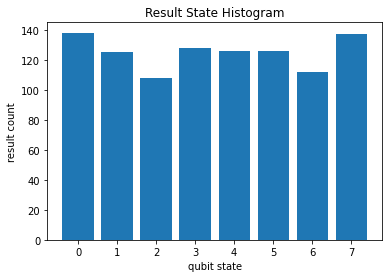

In [ ]:
# Plot the results
cirq.vis.plot_state_histogram(samples)

From the meaurement outputs, we see that all $8$ outputs are almost equally likely. So, we can safely conclude that $s = 000$.